In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize': [10, 10]},font_scale=1.3)

In [51]:
df = pd.read_csv(r'C:\Users\AssiaMohamed\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [52]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [54]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [55]:
df.isnull().sum().sum()

0

                                                             "Problems" 
TotalCharges column need be numeric not object.

categorical columns  must be converted:

-Binary columns like "gender", "Partner", "Churn" must be converted to 0/1.

-Multiclass columns like "InternetService", "Contract", and "PaymentMethod" were one-hot encoded.

scale numerical features to ensure they contribute equally, preventing larger ranges (e.g., TotalCharges) from dominating smaller ones (e.g., tenure), improving model performance.

In [56]:
# Convert 'TotalCharges' to numeric, coercing errors to NaN (to handle empty strings)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing values in 'TotalCharges' with median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [57]:
df = df.drop(columns=['customerID'], errors='ignore')

In [58]:
df['TotalCharges'].describe()

count    7043.000000
mean     2281.916928
std      2265.270398
min        18.800000
25%       402.225000
50%      1397.475000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

In [59]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()

#Separate binary and multiclass columns
binary_cols = [col for col in categorical_cols if df[col].nunique() == 2]
multiclass_cols = [col for col in categorical_cols if col not in binary_cols]

binary_mapping = {'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0}
for col in binary_cols:
    df[col] = df[col].map(binary_mapping)
    
#One-Hot Encoding for Multiclass Columns
df = pd.get_dummies(df, columns=multiclass_cols, drop_first=True)
print(df.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


In [60]:
from sklearn.preprocessing import MinMaxScaler
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
# Initialize Min-Max Scaler
scaler = MinMaxScaler()
# Apply Min-Max Scaling
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [61]:
df.drop_duplicates(inplace=True)

In [62]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7021 non-null   int64  
 1   SeniorCitizen                          7021 non-null   int64  
 2   Partner                                7021 non-null   int64  
 3   Dependents                             7021 non-null   int64  
 4   tenure                                 7021 non-null   float64
 5   PhoneService                           7021 non-null   int64  
 6   PaperlessBilling                       7021 non-null   int64  
 7   MonthlyCharges                         7021 non-null   float64
 8   TotalCharges                           7021 non-null   float64
 9   Churn                                  7021 non-null   int64  
 10  MultipleLines_No phone service         7021 non-null   bool   
 11  MultipleL

In [63]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000
mean,0.504344,0.162512,0.484546,0.300527,0.450965,0.902863,0.592651,0.463700,0.261961,0.264492
std,0.500017,0.368947,0.499797,0.458520,0.340763,0.296166,0.491376,0.299194,0.261403,0.441094
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.125000,1.000000,0.000000,0.174129,0.045275,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.402778,1.000000,1.000000,0.518905,0.159445,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.763889,1.000000,1.000000,0.712935,0.436522,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


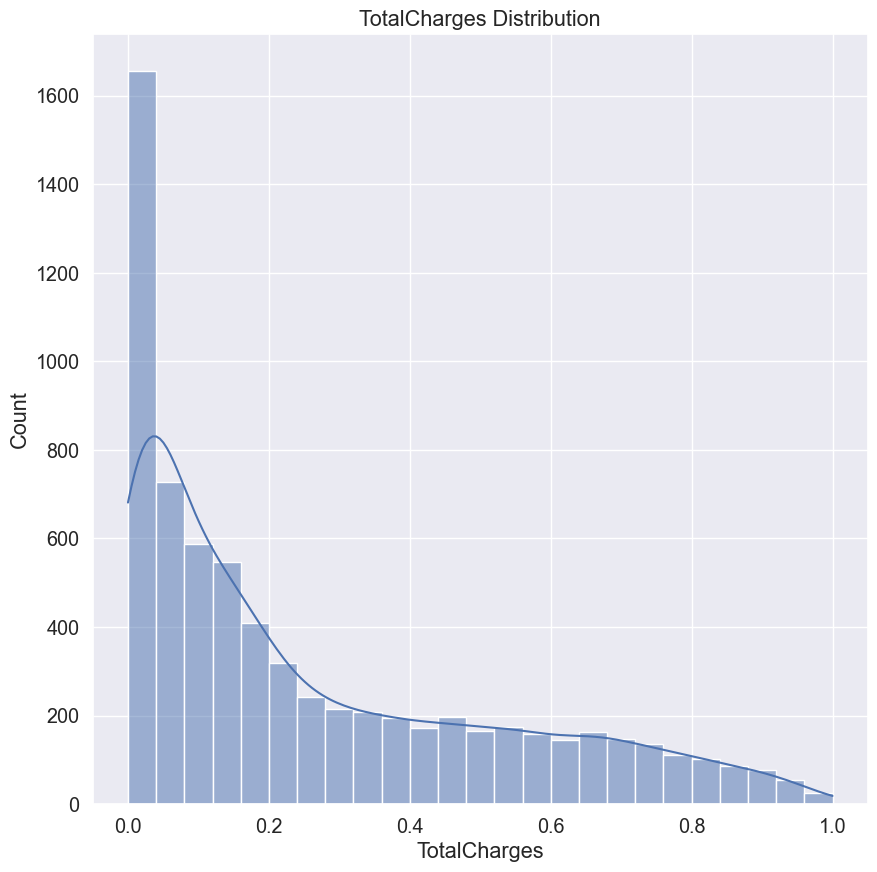

In [64]:
sns.histplot(df['TotalCharges'], kde=True)
plt.title('TotalCharges Distribution')
plt.show()

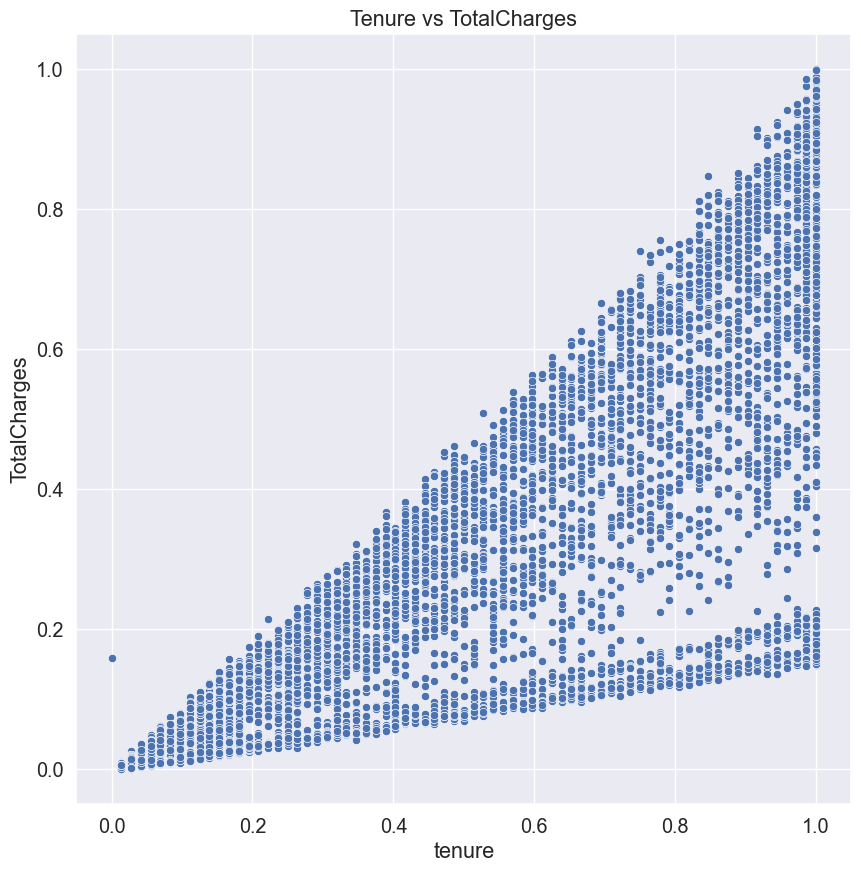

In [65]:
sns.scatterplot(x='tenure', y='TotalCharges', data=df)
plt.title('Tenure vs TotalCharges')
plt.show()